In [1]:
#Import packages

from qiskit import *
from numpy import identity as eye, trace, kron
import numpy as np
from qiskit.extensions import Initialize
import matplotlib.pyplot as plt
import math
from qiskit.tools.visualization import plot_histogram

In [3]:
#Load IBMQ account
token = IBMQ.stored_account()['token']
IBMQ.enable_account(token)
print(IBMQ.load_account())

ibmqfactory.load_account:WARNING:2022-03-11 11:09:03,734: Credentials are already in use. The existing account in the session will be replaced.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>


In [4]:
#This vector is used to help us check which position got switched.
#We want to put in a vector and see which entry get switched

v = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16])
normalized_v = v / np.sqrt(np.sum(v**2))

In [5]:
normalized_v

array([0.02585438, 0.05170877, 0.07756315, 0.10341754, 0.12927192,
       0.15512631, 0.18098069, 0.20683508, 0.23268946, 0.25854384,
       0.28439823, 0.31025261, 0.336107  , 0.36196138, 0.38781577,
       0.41367015])

# 2^{n-1} control that switches |0000> to |1000>

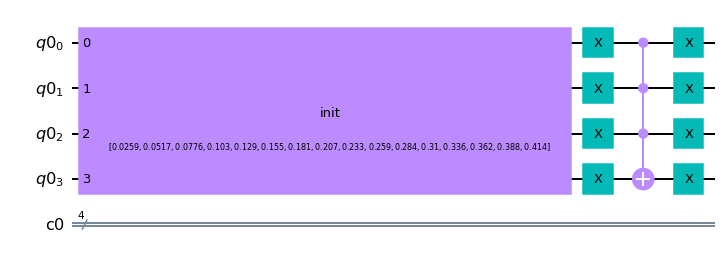

In [6]:
q1 = QuantumRegister(4)
c1 = ClassicalRegister(4)
qc1 = QuantumCircuit(q1, c1)


init_gate = Initialize(normalized_v) # Create a new initialize gate
init_gate.label = "init"    # Add a label to avoid the bug

qc1.append(init_gate, range(0, 4)) 
qc1.x(q1)
qc1.mcx([2, 0, 1], 3, mode='noancilla')
qc1.x(q1)
qc1.draw()
qc1.draw(output="mpl")



In [7]:
# Simulating the cirucits
back = Aer.get_backend('statevector_simulator')
results = execute(qc1, backend=back).result()

# get the output vector, compare it with the original vector
new_vec1 = results.get_statevector(qc1) 

for i in range(16):
    if normalized_v[i] == new_vec1[i]:
        None
    else:
        for j in range(16):
            if new_vec1[i] == normalized_v[j]:
                print(i, ' changed to ', j)
            

0  changed to  8
8  changed to  0


# This is the weird control-swap that works for |0100>:

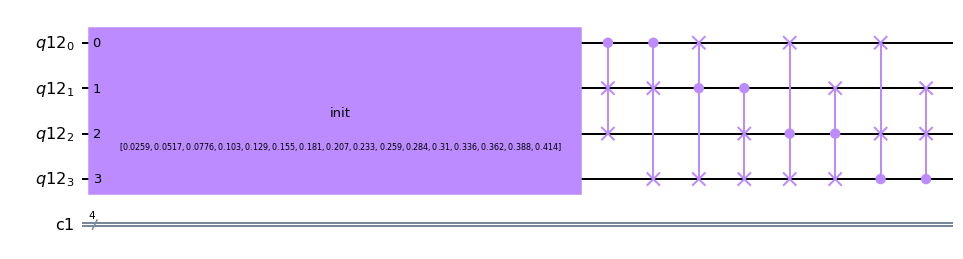

In [8]:
#This is the weird control-swap that works for |0100>:

q = QuantumRegister(4)
c = ClassicalRegister(4)
qc = QuantumCircuit(q, c)


init_gate = Initialize(normalized_v) # Create a new initialize gate
init_gate.label = "init"    # Add a label to avoid the bug

qc.append(init_gate, range(0, 4)) 

qc.cswap(0,1,2)
qc.cswap(0,1,3)
qc.cswap(1,0,3)
qc.cswap(1,2,3)
qc.cswap(2,0,3)
qc.cswap(2,1,3)
qc.cswap(3,0,2)
qc.cswap(3,1,2)


qc.draw()
qc.draw(output="mpl")


In [9]:
# Simulating the cirucits
back = Aer.get_backend('statevector_simulator')
results = execute(qc, backend=back).result()
new_vec = results.get_statevector(qc)

for i in range(16):
    if normalized_v[i] == new_vec[i]:
        None
    else:
        for j in range(16):
            if new_vec[i] == normalized_v[j]:
                print(i, ' changed to ', j)
            

3  changed to  10
5  changed to  12
6  changed to  3
10  changed to  5
12  changed to  6
